<a href="https://colab.research.google.com/github/cvsanjeev/profile/blob/main/ML_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [268]:
def computeCost(X,y,theta):
    
    m=len(y)
    preds=X.dot(theta)
    sq_err=(preds - y)**2
    J=1/(2*m) * np.sum(sq_err)
    
    return J

In [269]:
def gradientDescent(X,y,theta,alpha,iter):
    
    m=len(y)
    J_history=[]
    
    for i in range(iter):
        preds = X.dot(theta)
        error = np.dot(X.transpose(),(preds -y))
        des=alpha * (1/m) * error
        theta-=des
        J_history.append(computeCost(X,y,theta))
        if ((i % 10 == 0)&(i<=300)):
            print(f'Cost after {i} iterations: {computeCost(X,y,theta)}')
    
    return theta, J_history

In [270]:
def predict(x,theta):
    x_sample1=(x.astype(int)).reshape(1,5)
    x_sample2=np.concatenate((X_t,x_sample1), axis=0)
    x_sample3,_,_=normalization(x_sample2)
    x_sample4=x_sample3[-1,:].reshape(1,5)
    x_sample5=np.append(np.ones(1),x_sample4)
    preds= np.dot(theta.transpose(),x_sample5)
    
    return preds[0]

In [271]:
med_data=pd.read_csv("/content/linear_regression_dataset.csv", header=None)

In [272]:
med_data.head()

,0,1,2,3,4,5
0,AGE,FEMALE,LOS,RACE,TOTCHG,APRDRG
1,17,1,2,1,2660,560
2,17,0,2,1,1689,753
3,17,1,7,1,20060,930
4,17,1,1,1,736,758


In [273]:
med_data.dropna(inplace = True)
med_data = med_data.drop(labels=0, axis=0)
med_data.isnull().sum()


0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [274]:
def normalization(X):
    
    mu=np.mean(X,axis=0)
    st=np.std(X,axis=0)
    
    X_norm = (X - mu)/st
    print(X_norm)
    
    return X_norm , mu , st

In [275]:
med_data2=med_data.values
m=len(med_data2[:,-1])
X_m2=med_data2[:,0:4].reshape(m,4)
X_m1=med_data2[:,-1].reshape(m,1)
X_m=np.concatenate((X_m2,X_m1), axis=1)
X_m = X_m.astype(int)
X_t=X_m

In [276]:
X_m, mean_X_m, std_X_m = normalization(X_m)
X_m = np.append(np.ones((m,1)),X_m,axis=1)
y_m=med_data2[:,-2].reshape(m,1)
y_m=y_m.astype(int)
theta2=np.zeros((6,1))

[[ 1.71382949  0.97819361 -0.24668147 -0.15198702 -0.31580792]
 [ 1.71382949 -1.02229251 -0.24668147 -0.15198702  0.7665591 ]
 [ 1.71382949  0.97819361  1.23996167 -0.15198702  1.75919622]
 ...
 [-0.73371522  0.97819361 -0.24668147 -0.15198702  0.13284162]
 [-0.73371522  0.97819361 -0.24668147 -0.15198702  0.13284162]
 [-0.73371522 -1.02229251  0.34797579 -0.15198702  0.13284162]]


In [277]:
computeCost(X_m,y_m,theta2)

11414843.951903807

In [278]:
theta2, J_history_m = gradientDescent(X_m,y_m,theta2,0.01,20000)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],5))+"x1 + "+str(round(theta2[2,0],2))+"x2 +"+str(round(theta2[3,0],2))+"x3 +"+str(round(theta2[4,0],2))+"x4 +"+str(round(theta2[5,0],2))+"x5")

Cost after 0 iterations: 11260123.756573386
Cost after 10 iterations: 9869090.398381019
Cost after 20 iterations: 8725676.960861402
Cost after 30 iterations: 7785379.135390386
Cost after 40 iterations: 7011774.376126768
Cost after 50 iterations: 6375037.384956135
Cost after 60 iterations: 5850731.8516133055
Cost after 70 iterations: 5418826.264413408
Cost after 80 iterations: 5062891.6368464995
Cost after 90 iterations: 4769447.058765342
Cost after 100 iterations: 4527425.4722114
Cost after 110 iterations: 4327737.304304422
Cost after 120 iterations: 4162913.812384696
Cost after 130 iterations: 4026815.408528319
Cost after 140 iterations: 3914392.990406023
Cost after 150 iterations: 3821492.5402055755
Cost after 160 iterations: 3744695.06470901
Cost after 170 iterations: 3681185.4192167018
Cost after 180 iterations: 3628644.751403313
Cost after 190 iterations: 3585162.271119339
Cost after 200 iterations: 3549162.841101367
Cost after 210 iterations: 3519347.5257886406
Cost after 220 ite

Text(0.5, 1.0, 'Cost function ')

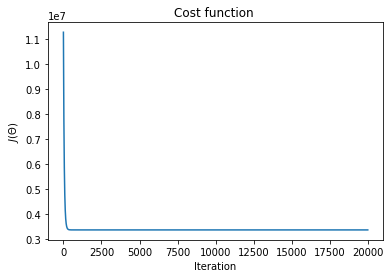

In [279]:
plt.plot(J_history_m)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function ")

In [281]:
#x_sample = normalization(np.array([17,2,2,1,560]))[0]
x_sample=np.array([0,0,2,1,640])
predict_tot=predict(x_sample,theta2)
print("")
print("Predicted TOTCHG is "+str(round(predict_tot,0)))

[[ 1.71609121  0.98019606 -0.24641967 -0.15183145 -0.31638457]
 [ 1.71609121 -1.02020406 -0.24641967 -0.15183145  0.76704733]
 [ 1.71609121  0.98019606  1.2416218  -0.15183145  1.76066104]
 ...
 [-0.73258686  0.98019606 -0.24641967 -0.15183145  0.13270637]
 [-0.73258686 -1.02020406  0.34879692 -0.15183145  0.13270637]
 [-0.73258686 -1.02020406 -0.24641967 -0.15183145  0.13270637]]

Predicted TOTCHG is 1508.0
